In [1]:
#ok, before this starts, I did not say these words, I do not think it is funny
# You people said this and I am just acting as a mirror to your hatred
import nltk
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
from nltk.tokenize import word_tokenize
warnings.filterwarnings('ignore')



df = pd.read_csv('C:/ML/python/data/labeled_data.csv',delimiter=',')

df.dtypes


Unnamed: 0             int64
count                  int64
hate_speech            int64
offensive_language     int64
neither                int64
class                  int64
tweet                 object
dtype: object

In [2]:
df.drop(['Unnamed: 0','count'],axis=1,inplace=True)
df.duplicated().sum()
df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

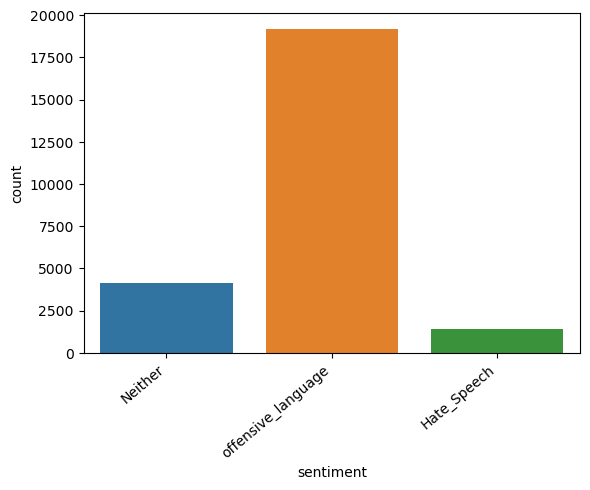

In [3]:
#using the sentiment class to make a sentiment anaylsis
df['sentiment'] = df['class'].map({0:'Hate_Speech',1:'offensive_language',
                                  2: 'Neither'})

fig, axs = plt.subplots(figsize=(6,5)) 
sns.countplot(x='sentiment',data=df,ax=axs)
axs.set_xticklabels(axs.get_xticklabels(),rotation=40,ha="right")
plt.tight_layout()
plt.show()



In [4]:
#ok, first step, making tweets lower-cased
df['tweet'] = df['tweet'].str.lower()
print(df['tweet'])


0        !!! rt @mayasolovely: as a woman you shouldn't...
1        !!!!! rt @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...
3        !!!!!!!!! rt @c_g_anderson: @viva_based she lo...
4        !!!!!!!!!!!!! rt @shenikaroberts: the shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@lifeasking: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like i ain...
24781                youu got wild bitches tellin you lies
24782    ~~ruffled | ntac eileen dahlia - beautiful col...
Name: tweet, Length: 24783, dtype: object


In [5]:
#oh lord, these are some naught features
#removing html tags

import re


def remove_html_tags(text):
    pattern = r'<.*?>' 
    text = re.sub(pattern, '', text)
    return text

df['tweet'] = df['tweet'].apply(remove_html_tags)




In [6]:
#removing url tags

def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)


df['tweet'] = df['tweet'].apply(remove_url)
print(df['tweet'])

0        !!! rt @mayasolovely: as a woman you shouldn't...
1        !!!!! rt @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...
3        !!!!!!!!! rt @c_g_anderson: @viva_based she lo...
4        !!!!!!!!!!!!! rt @shenikaroberts: the shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@lifeasking: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like i ain...
24781                youu got wild bitches tellin you lies
24782    ~~ruffled | ntac eileen dahlia - beautiful col...
Name: tweet, Length: 24783, dtype: object


In [7]:
#removing punctionation
import string
PUNC = string.punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans('','',PUNC))

df['tweet'] = df['tweet'].apply(remove_punctuation)
print(df['tweet'])

0         rt mayasolovely as a woman you shouldnt compl...
1         rt mleew17 boy dats coldtyga dwn bad for cuff...
2         rt urkindofbrand dawg rt 80sbaby4life you eve...
3           rt cganderson vivabased she look like a tranny
4         rt shenikaroberts the shit you hear about me ...
                               ...                        
24778    yous a muthafin lie 8220lifeasking 20pearls co...
24779    youve gone and broke the wrong heart baby and ...
24780    young buck wanna eat dat nigguh like i aint fu...
24781                youu got wild bitches tellin you lies
24782    ruffled  ntac eileen dahlia  beautiful color c...
Name: tweet, Length: 24783, dtype: object


In [8]:
#removing numerical characters, "rt", and stuff

df['tweet'] = df['tweet'].str.replace("rt","")
df['tweet'] = df['tweet'].str.replace("\d","")
df["tweet"] = df["tweet"].str.replace("[^\w\s]","")
print(df['tweet'])


0          mayasolovely as a woman you shouldnt complai...
1          mleew boy dats coldtyga dwn bad for cuffin d...
2          urkindofbrand dawg  sbabylife you ever fuck ...
3              cganderson vivabased she look like a tranny
4          shenikarobes the shit you hear about me migh...
                               ...                        
24778    yous a muthafin lie lifeasking pearls coreyema...
24779    youve gone and broke the wrong hea baby and dr...
24780    young buck wanna eat dat nigguh like i aint fu...
24781                youu got wild bitches tellin you lies
24782    ruffled  ntac eileen dahlia  beautiful color c...
Name: tweet, Length: 24783, dtype: object


In [9]:
#removing stopwords

nltk.download("stopwords")

sw = list(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in sw]
    return ' '.join(filtered_tokens)

df['tweet'] = df['tweet'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
#ok, results may be shocking

from textblob import TextBlob

nltk.download("omw-1.4")
nltk.download("wordnet")


text_ = " ".join(i for i in df.tweet)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


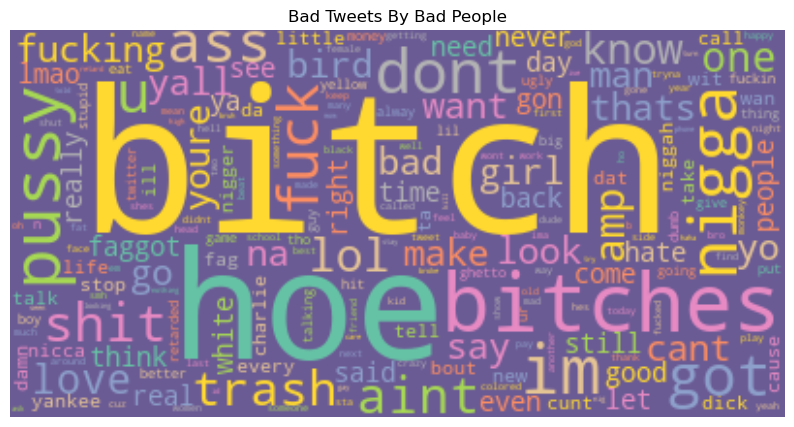

In [11]:
#your mother should have washed your mouths out with soup and threw away your xbox!
#shame on you

text = " ".join(i for i in df.tweet)

wordcloud = WordCloud(
    background_color="#6B5B95",
    colormap="Set2",
    collocations=False).generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Bad Tweets By Bad People")
plt.show()




In [12]:
#wow, you guys are so classy
#These are the most commonly used words

#I did not come up with this
# I did not say this
# this is public domain
# I did not say these words
#these people did and shame you them(you possibly)


print(text_.count("bitch"))
print(text_.count("bitches"))
print(text_.count("nigga"))
print(text_.count("niggas"))
print(text_.count("hoe"))
print(text_.count("trash"))
print(text_.count("pussy"))
print(text_.count("fuck"))
print(text_.count("fucking"))
print(text_.count("love"))
print(text_.count("faggot"))



11597
3135
2489
817
4561
1188
2185
2754
654
951
547


In [13]:
#ok, more uncessary hatred

Hate_tweet = (df['sentiment'] == "Hate_Speech").astype('int32')
Hate_tweet.describe()

offensive_tweets = (df['sentiment'] == "offensive_language").astype('int32')
offensive_tweets.describe()

neither = (df['sentiment'] == "Neither").astype('int32')
neither.value_counts()


0    20620
1     4163
Name: sentiment, dtype: int64

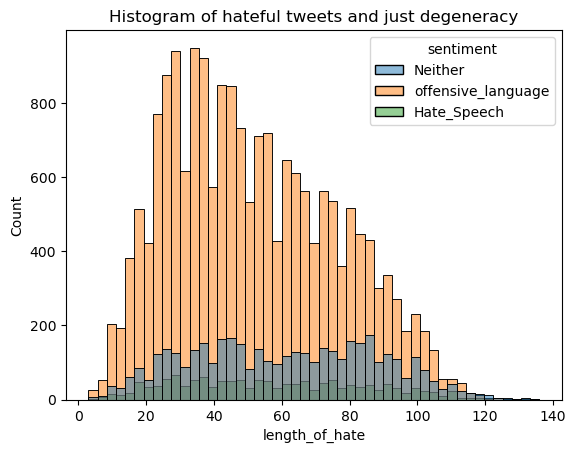

In [14]:
#ok, now a time for a histogram of hatred
df['length_of_hate'] = df['tweet'].apply(len)

sns.histplot(x='length_of_hate',hue='sentiment',data=df)
plt.title('Histogram of hateful tweets and just degeneracy')
plt.show()


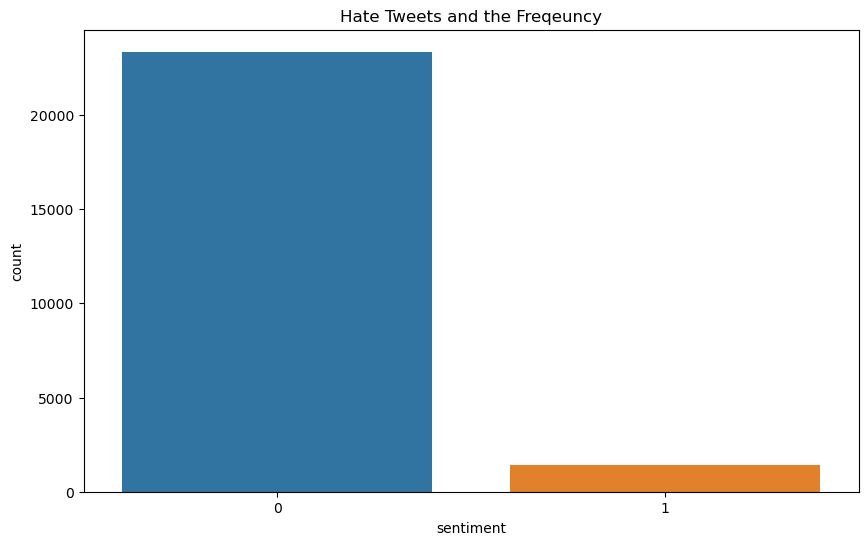

In [15]:
#This is what happens when you do have strong parental support growing up and I am sorry

plt.figure(figsize=(10,6))
sns.countplot(x=Hate_tweet)
plt.title('Hate Tweets and the Freqeuncy')
plt.xticks()
plt.show()




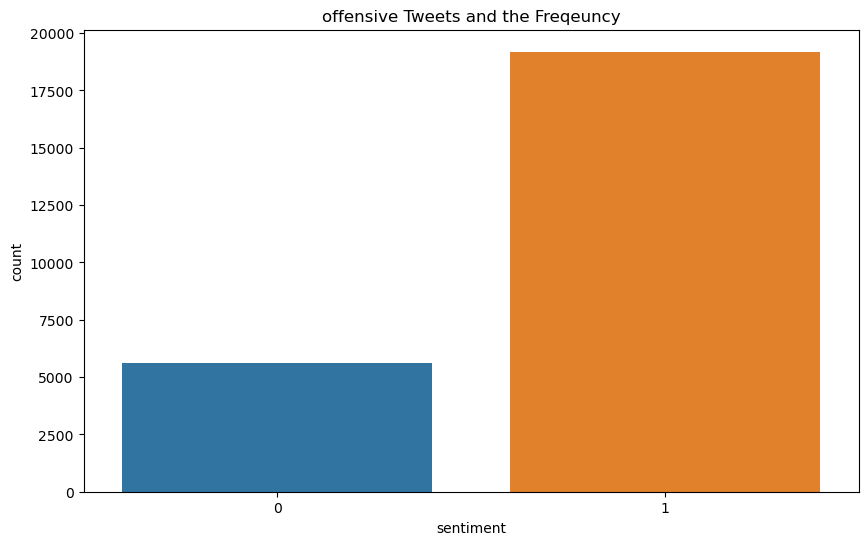

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x=offensive_tweets)
plt.title('offensive Tweets and the Freqeuncy')
plt.xticks()
plt.show()

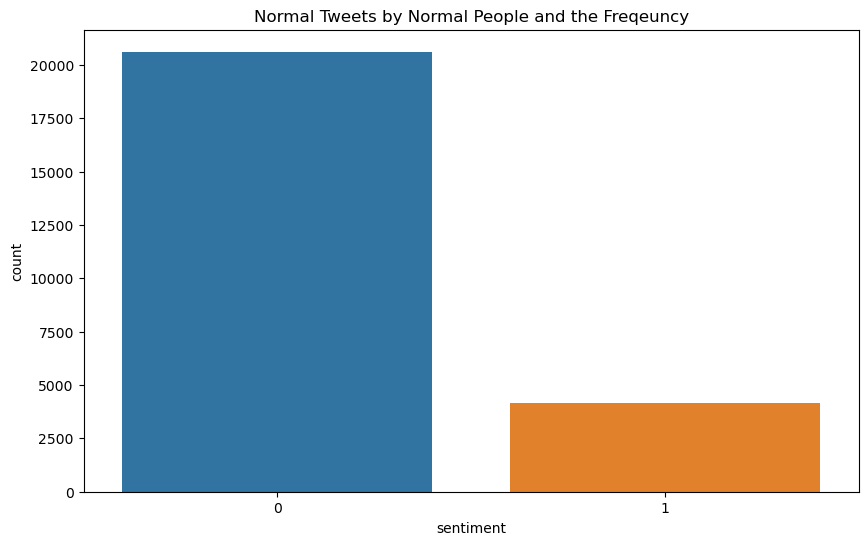

In [17]:
#wow
#you feel good about yourselfs?
plt.figure(figsize=(10,6))
sns.countplot(x=neither)
plt.title('Normal Tweets by Normal People and the Freqeuncy')
plt.xticks()
plt.show()



In [18]:
#ok, it pains me to do this, but time to evaluate hatred
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()


from sklearn.model_selection import train_test_split

X = df['tweet']
y = df['sentiment']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=1)

X_train = tfid.fit_transform(X_train)
X_test = tfid.transform(X_test)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()

from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()


from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


def evaluate_hate(X_train,X_test,y_train,y_test,model):
    model = model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test,pred)
    clf_rpt = classification_report(y_test,pred)
    print(f'{model.__class__.__name__}, --ACC-- {acc*100:.2f}%; --clf_rpt-- {clf_rpt}')
    return pred


lr_pred = evaluate_hate(X_train, X_test, y_train, y_test, lr)
GBC_pred = evaluate_hate(X_train, X_test, y_train, y_test, GBC)
MNB_pred = evaluate_hate(X_train, X_test, y_train, y_test, MNB)
tree_pred = evaluate_hate(X_train, X_test, y_train, y_test, tree)

LogisticRegression, --ACC-- 89.29%; --clf_rpt--                     precision    recall  f1-score   support

       Hate_Speech       0.57      0.17      0.26       296
           Neither       0.83      0.82      0.82       808
offensive_language       0.91      0.96      0.94      3853

          accuracy                           0.89      4957
         macro avg       0.77      0.65      0.67      4957
      weighted avg       0.88      0.89      0.88      4957

GradientBoostingClassifier, --ACC-- 86.52%; --clf_rpt--                     precision    recall  f1-score   support

       Hate_Speech       0.45      0.22      0.30       296
           Neither       0.86      0.64      0.74       808
offensive_language       0.88      0.96      0.92      3853

          accuracy                           0.87      4957
         macro avg       0.73      0.61      0.65      4957
      weighted avg       0.85      0.87      0.85      4957

MultinomialNB, --ACC-- 80.09%; --clf_rpt--        

<Axes: title={'center': 'Confusion Matrix for LogisticRegression'}>

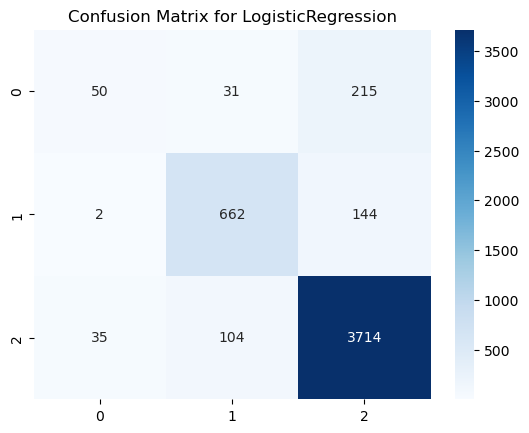

In [19]:
def confusion_plot_of_hatred_matrix(X_train,X_test,y_train,y_test,model):
    model = model.fit(X_train,y_train)
    pred = model.predict(X_test)
    con = confusion_matrix(y_test,pred)
    heatmap = sns.heatmap(con,annot=True,fmt="d",cmap="Blues")
    heatmap.set_title(f'Confusion Matrix for {model.__class__.__name__}')
    return heatmap
confusion_plot_of_hatred_matrix(X_train, X_test, y_train, y_test, lr)

<Axes: title={'center': 'Confusion Matrix for GradientBoostingClassifier'}>

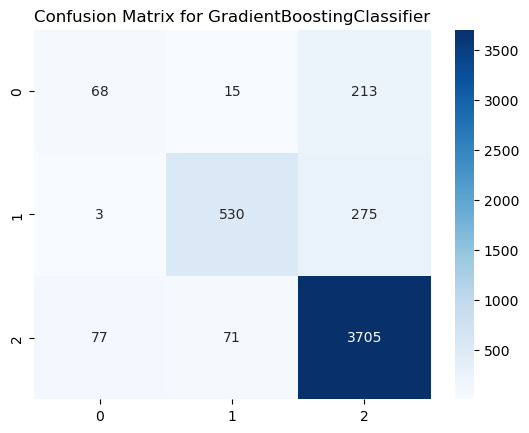

In [20]:
#confusion matrix for Gradeint Boost

confusion_plot_of_hatred_matrix(X_train, X_test, y_train, y_test, GBC)


<Axes: title={'center': 'Confusion Matrix for MultinomialNB'}>

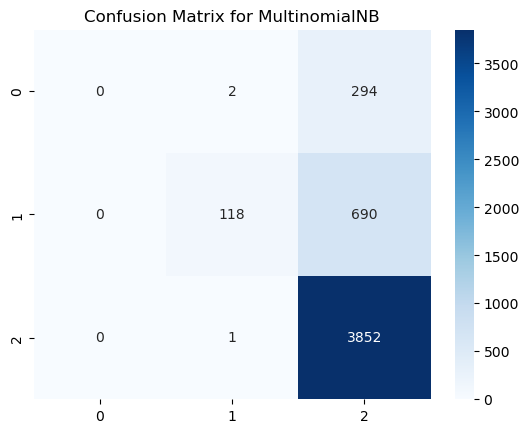

In [21]:
#confusion matrix of delusional people but using Naive Bayes

confusion_plot_of_hatred_matrix(X_train, X_test, y_train, y_test,MNB)

<Axes: title={'center': 'Confusion Matrix for DecisionTreeClassifier'}>

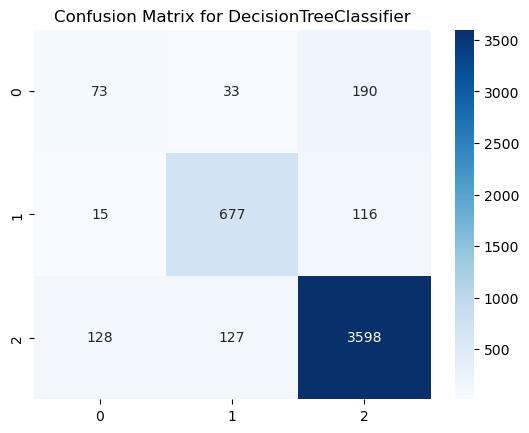

In [22]:
#more confusion matrixs, however, now for Decision trees (at least tres are peaceful)

confusion_plot_of_hatred_matrix(X_train, X_test, y_train, y_test,tree)